# 

<font size=5>**实验2-2 决策树**</font>

<font size=4>**初始设置与检查**</font>

In [1]:
# Python版本检查
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn版本检查
import sklearn
assert sklearn.__version__ >= "0.20"

# 通用库导入
import numpy as np
import os

# 固定随机起点，保证输出稳定
np.random.seed(42)

# 绘图准备
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 设置图像保存
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<font size=4>**决策树Python程序示例：使用鸢尾花数据展示决策树的构建**</font> 

In [2]:
# 从sklearn.datasets模块中导入load_iris函数，用于加载鸢尾花数据集  
from sklearn.datasets import load_iris  
  
# 从sklearn.tree模块中导入DecisionTreeClassifier类，该类是一个实现决策树分类算法的类  
from sklearn.tree import DecisionTreeClassifier
  
# 使用load_iris函数加载鸢尾花数据集，并将其赋值给iris变量  
iris = load_iris()  
  
# X变量表示鸢尾花数据集中的特征数据，这里我们只取花瓣的长度和宽度作为特征，因此使用[:, 2:]进行切片  
X = iris.data[:, 2:] # petal length and width  
  
# y变量表示鸢尾花数据集中的目标标签，即每种鸢尾花的种类  
y = iris.target  
  
# 创建一个DecisionTreeClassifier对象，设置决策树的最大深度为2，并设置随机种子为42以确保结果的可重复性  
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42) 
  
# 使用fit方法对决策树模型进行训练，输入特征数据X和目标标签y  
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

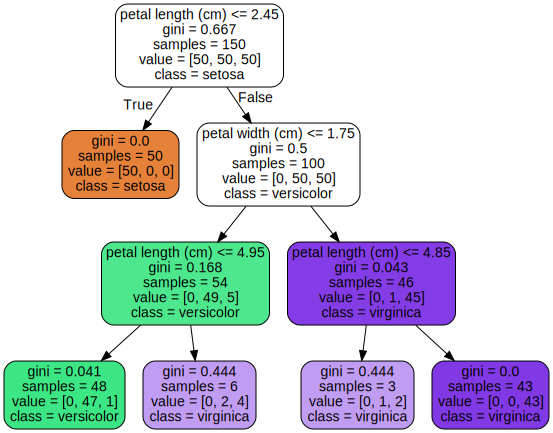

In [3]:
# 导入Graphviz的Source类，用于从.dot文件生成可视化图形  
from graphviz import Source  
# 从sklearn.tree模块导入export_graphviz函数，用于将决策树导出为Graphviz的.dot格式  
from sklearn.tree import export_graphviz  
  
# 使用export_graphviz函数将训练好的决策树导出为.dot格式的文件  
# 参数说明：  
# tree_clf：已经训练好的决策树分类器  
# out_file：输出的.dot文件的路径，这里使用了os.path.join来拼接路径，但代码中未显示导入os模块和定义IMAGES_PATH变量  
# feature_names：特征名称列表，由于我们只取了花瓣的长度和宽度，所以使用iris.feature_names[2:]  
# class_names：目标类别名称列表，直接使用iris.target_names  
# rounded：是否绘制圆角矩形节点，True表示绘制  
# filled：是否填充节点颜色，True表示填充  
export_graphviz(  
    tree_clf,  
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),  # 这里假设IMAGES_PATH已经被定义且指向一个有效的目录  
    feature_names=iris.feature_names[2:],  
    class_names=iris.target_names,  
    rounded=True,  
    filled=True  
)  
  
# 使用Source类的from_file方法从.dot文件生成可视化图形  
# 注意：这一步通常在Jupyter Notebook或类似的交互式环境中使用，用于直接显示图形  
# 如果是在普通的Python脚本中，你可能需要将.dot文件转换为其他格式（如.png或.pdf）来查看  
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

<font size=4>**绘制决策树分类边界**</font>

Saving figure decision_tree_decision_boundaries_plot


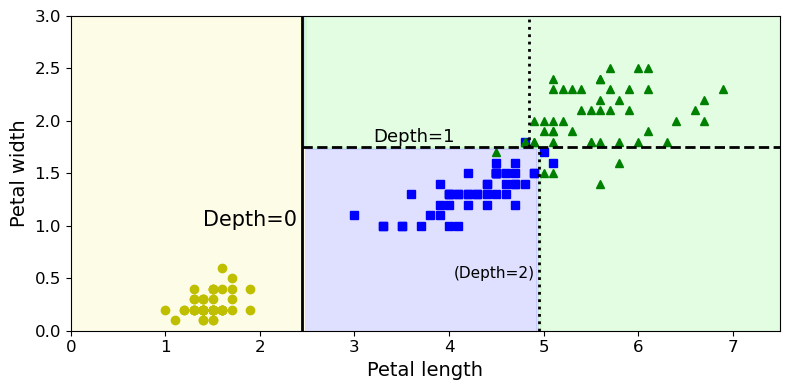

In [4]:
# 导入matplotlib中用于自定义颜色映射的类  
from matplotlib.colors import ListedColormap  
  
# 定义绘制决策边界的函数  
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):  
    # 生成x1和x2的线性空间，用于绘制决策边界  
    x1s = np.linspace(axes[0], axes[1], 100)  
    x2s = np.linspace(axes[2], axes[3], 100)  
    # 使用meshgrid生成网格数据  
    x1, x2 = np.meshgrid(x1s, x2s)  
    # 将网格数据展平，用于预测  
    X_new = np.c_[x1.ravel(), x2.ravel()]  
    # 对新的数据点进行预测  
    y_pred = clf.predict(X_new).reshape(x1.shape)  
    # 自定义颜色映射，用于绘制决策边界  
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])  
    # 使用contourf绘制决策边界的填充区域  
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)  
      
    # 如果iris为False，则使用另一种颜色映射绘制决策边界的轮廓线  
    if not iris:  
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])  
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)  
      
    # 如果plot_training为True，则绘制训练数据点  
    if plot_training:  
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")  
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")  
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")  
        # 设置坐标轴的范围  
        plt.axis(axes)  
      
    # 根据iris的值设置x轴和y轴的标签  
    if iris:  
        plt.xlabel("Petal length", fontsize=14)  
        plt.ylabel("Petal width", fontsize=14)  
    else:  
        plt.xlabel(r"$x_1$", fontsize=18)  
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)  
      
    # 如果legend为True，则显示图例  
    if legend:  
        plt.legend(loc="lower right", fontsize=14)  
  
# 设置画布的尺寸  
plt.figure(figsize=(8, 4))  
# 调用函数绘制决策边界  
plot_decision_boundary(tree_clf, X, y)  
  

# 绘制决策树各个深度的边界线  
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)  
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)  
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)  
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)  
  
# 在图上标注决策树的深度  
plt.text(1.40, 1.0, "Depth=0", fontsize=15)  
plt.text(3.2, 1.80, "Depth=1", fontsize=13)  
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)  
 
# 保存图像  
save_fig("decision_tree_decision_boundaries_plot")  
# 显示图像  
plt.show()

<font size=4>**预测**</font>

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([2])

<font size=4>**正则化超参数**</font>

In [7]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


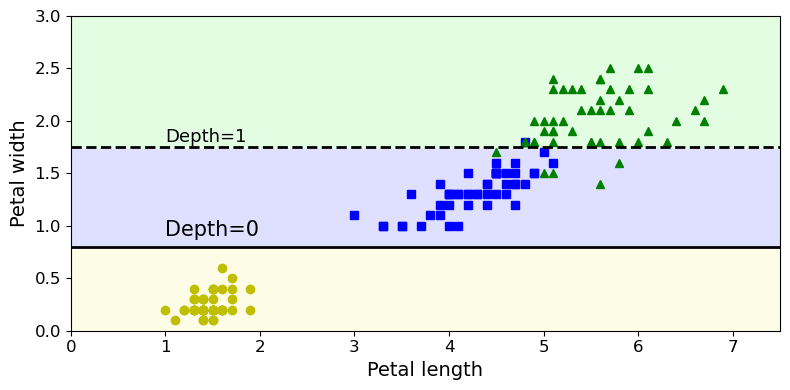

In [8]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

Saving figure min_samples_leaf_plot


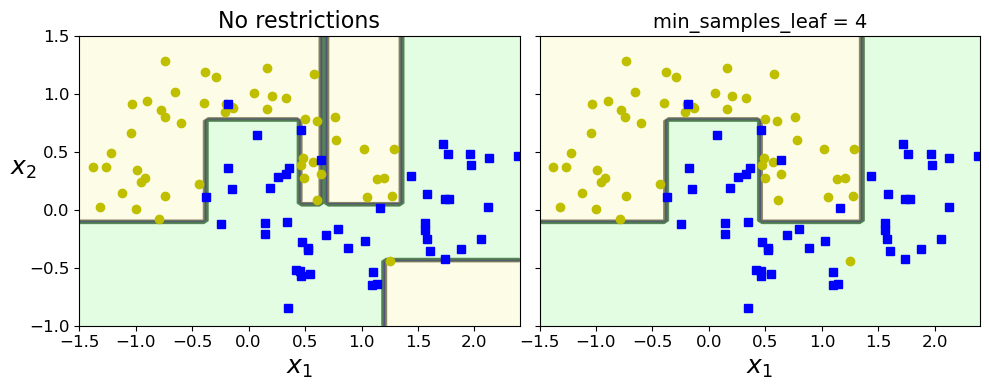

In [9]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

<font size=4>**对数据集进行旋转也会导致完全不同的决策边界**</font>

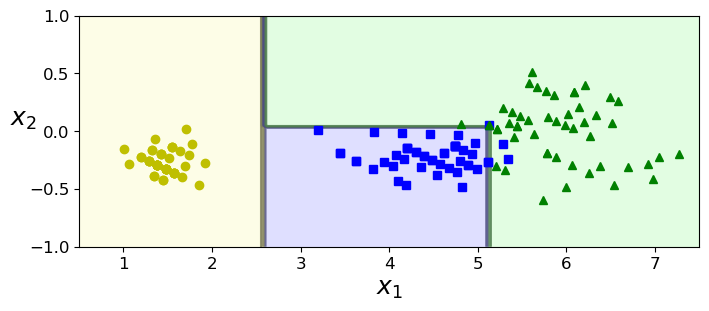

In [10]:
# 定义一个角度，这里是20度（以弧度为单位）。  
angle = np.pi / 180 * 20  
  
# 创建一个二维旋转矩阵。旋转矩阵用于对二维数据进行旋转。  
# 旋转矩阵的公式为：[[cos(theta), -sin(theta)], [sin(theta), cos(theta)]]  
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])  
  
# 使用旋转矩阵对原始数据集X进行旋转，得到旋转后的数据集Xr。  
# 这里的dot操作是矩阵乘法，用于将X中的每个样本点都进行旋转。  
Xr = X.dot(rotation_matrix)  

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

Saving figure sensitivity_to_rotation_plot


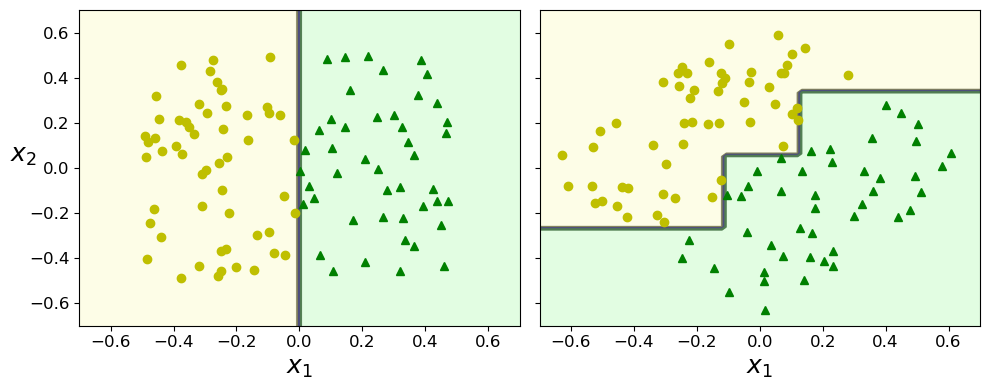

In [11]:
# 设置随机数种子，使得每次运行代码时生成的随机数序列都是相同的，确保结果的可重复性。  
np.random.seed(6)  
  
# 生成一个100行2列的矩阵，其元素是从-0.5到0.5之间的随机浮点数。  
# 这将用作数据集的特征值。  
Xs = np.random.rand(100, 2) - 0.5  
  
# 创建一个标签数组ys，如果Xs中每行的第一个元素大于0，则对应的标签为2，否则为0。  
# 这意味着我们的分类任务是一个简单的二分类问题，以X轴为分界线。  
ys = (Xs[:, 0] > 0).astype(np.float32) * 2  
  
# 定义一个角度，这里是45度（以弧度为单位）。  
angle = np.pi / 4  
  
# 创建一个二维旋转矩阵，用于对二维数据集进行旋转。  
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])  
  
# 使用旋转矩阵对原始数据集Xs进行旋转，得到旋转后的数据集Xsr。  
Xsr = Xs.dot(rotation_matrix)  
  
# 创建一个决策树分类器对象，并设置随机状态为42以确保结果的可重复性。  
tree_clf_s = DecisionTreeClassifier(random_state=42)  
  
# 使用原始数据集Xs和标签ys来训练决策树分类器。  
tree_clf_s.fit(Xs, ys)  
  
# 创建另一个决策树分类器对象，同样设置随机状态为42。  
tree_clf_sr = DecisionTreeClassifier(random_state=42)  
  
# 使用旋转后的数据集Xsr和相同的标签ys来训练第二个决策树分类器。  
tree_clf_sr.fit(Xsr, ys) 

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()